In [1]:
import pandas as pd
import re
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression


# loading data

In [17]:
data1 = pd.read_csv('Playstore_final.csv', encoding='utf-8')
# data2 = pd.read_csv('GooglePlay.csv')

<ipython-input-17-3b6591edb419>:1: DtypeWarning: Columns (7,12,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  data1 = pd.read_csv('Playstore_final.csv', encoding='utf-8')


# Handling missing values

In [18]:
data1.head(10)

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Free,Price,Currency,...,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56
0,Logistics Management,com.eniseistudio.logistics_management,Education,4.090909,66.0,"10,000+",10000.0,True,0.0,USD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Estados Unidos Noticias,com.eniseistudio.news.estados_unidos,News & Magazines,4.000000,8.0,"1,000+",1000.0,True,0.0,USD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Dental Assistant,com.eniseistudio.dental_assistant,Education,3.866667,15.0,"10,000+",10000.0,True,0.0,USD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Medical Assistant,com.eniseistudio.course.medical_assistant,Education,4.000000,18.0,"5,000+",5000.0,True,0.0,USD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Business Administration,com.eniseistudio.majors.course.business_admini...,Education,4.023256,86.0,"50,000+",50000.0,True,0.0,USD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Economics,com.eniseistudio.economics,Education,4.138614,223.0,"100,000+",100000.0,True,0.0,USD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Cosmetology,com.eniseistudio.course.cosmetology,Education,2.421053,19.0,"5,000+",5000.0,True,0.0,USD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Learn Python,com.jquiz.python,Education,0.000000,NaN,10+,10.0,True,0.0,USD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Quality Management,com.eniseistudio.quality_management,Education,4.333334,6.0,"5,000+",5000.0,True,0.0,USD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Tourism Management,com.eniseistudio.tourism_management,Education,4.730769,26.0,"10,000+",10000.0,True,0.0,USD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Cleaning data

In [29]:
# Data cleaning:
def convert_millions_to_number(inputStr):
    return inputStr.replace('M', '')
def convert_plus_to_number(inputStr):
    return inputStr.replace('+', '')
def convert_camma_to_number(inputStr):
    return inputStr.replace(',', '')

for col in ['Size']:
    if 'M' in data1[col].iloc[0]:
        data1[col] = convert_millions_to_number(data1[col])
for col in ['Installs']:
    if '+' in data1[col].iloc[0]:
        data1[col] = data1[col].apply(convert_plus_to_number)
    if ',' in data1[col].iloc[0]:
        data1[col] = data1[col].apply(convert_camma_to_number)

for col in ['Rating' , 'Reviews','Size','Installs']:
    if data1[col].dtype == 'object':
        data1[col] = pd.to_numeric(data1[col], errors='coerce')

        data1[col] = data1[col].astype('Float64')

### Filling NuLL Value with the mean of a coLumn

In [31]:
means = data1[['Rating', 'Rating Count', 'Price','Size','Installs']].mean()

data1[['Rating', 'Rating Count', 'Price','Size','Installs']] = data1[['Rating', 'Rating Count', 'Price','Size','Installs']].fillna(means)

data1.head(10)


,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Free,Price,Currency,...,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56
0,Logistics Management,com.eniseistudio.logistics_management,Education,0.818182,5.737188e-07,10000.0,1.000000e-06,True,0.0,USD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Estados Unidos Noticias,com.eniseistudio.news.estados_unidos,News & Magazines,0.800000,3.701412e-08,1000.0,1.000000e-07,True,0.0,USD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Dental Assistant,com.eniseistudio.dental_assistant,Education,0.773333,1.017888e-07,10000.0,1.000000e-06,True,0.0,USD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Medical Assistant,com.eniseistudio.course.medical_assistant,Education,0.800000,1.295494e-07,5000.0,5.000000e-07,True,0.0,USD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Business Administration,com.eniseistudio.majors.course.business_admini...,Education,0.804651,7.587894e-07,50000.0,5.000000e-06,True,0.0,USD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Economics,com.eniseistudio.economics,Education,0.827723,2.026523e-06,100000.0,1.000000e-05,True,0.0,USD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Cosmetology,com.eniseistudio.course.cosmetology,Education,0.484211,1.388029e-07,5000.0,5.000000e-07,True,0.0,USD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Learn Python,com.jquiz.python,Education,0.000000,2.050765e-04,10.0,1.000000e-09,True,0.0,USD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Quality Management,com.eniseistudio.quality_management,Education,0.866667,1.850706e-08,5000.0,5.000000e-07,True,0.0,USD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Tourism Management,com.eniseistudio.tourism_management,Education,0.946154,2.035777e-07,10000.0,1.000000e-06,True,0.0,USD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### using regression to fill null values

In [6]:
# Assuming df is your DataFrame with null values
# Split the dataset into two parts: one with complete data and one with missing values
complete_data = data1.dropna()
incomplete_data = data1[data1.isnull().any(axis=1)]

# Specify the target column with missing values
target_column = 'Rating'

# Extract features and target variables from complete data
X_train = complete_data.drop(columns=['Rating', 'Rating Count','Price'])
y_train = complete_data[target_column]
type(X_train)
# Train a regression model
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Use the trained model to predict missing values
X_test = incomplete_data.drop(columns=[target_column])
predicted_values = regression_model.predict(X_test)

# Fill the missing values in the DataFrame with the predicted values
incomplete_data[target_column] = predicted_values
# Combine the incomplete data with the complete data
filled_data = pd.concat([complete_data, incomplete_data])


ValueError: Found array with 0 sample(s) (shape=(0, 54)) while a minimum of 1 is required by LinearRegression.

## data conversion

### normalizing the data

In [32]:
from sklearn.preprocessing import MinMaxScaler

columns_to_normalize = ['Rating', 'Rating Count', 'Price','Minimum Installs']

scaler = MinMaxScaler()

data1[columns_to_normalize] = scaler.fit_transform(data1[columns_to_normalize])

data1.head(10)


,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Free,Price,Currency,...,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56
0,Logistics Management,com.eniseistudio.logistics_management,Education,0.818182,5.737188e-07,10000.0,1.000000e-06,True,0.0,USD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Estados Unidos Noticias,com.eniseistudio.news.estados_unidos,News & Magazines,0.800000,3.701412e-08,1000.0,1.000000e-07,True,0.0,USD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Dental Assistant,com.eniseistudio.dental_assistant,Education,0.773333,1.017888e-07,10000.0,1.000000e-06,True,0.0,USD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Medical Assistant,com.eniseistudio.course.medical_assistant,Education,0.800000,1.295494e-07,5000.0,5.000000e-07,True,0.0,USD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Business Administration,com.eniseistudio.majors.course.business_admini...,Education,0.804651,7.587894e-07,50000.0,5.000000e-06,True,0.0,USD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Economics,com.eniseistudio.economics,Education,0.827723,2.026523e-06,100000.0,1.000000e-05,True,0.0,USD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Cosmetology,com.eniseistudio.course.cosmetology,Education,0.484211,1.388029e-07,5000.0,5.000000e-07,True,0.0,USD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Learn Python,com.jquiz.python,Education,0.000000,2.050765e-04,10.0,1.000000e-09,True,0.0,USD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Quality Management,com.eniseistudio.quality_management,Education,0.866667,1.850706e-08,5000.0,5.000000e-07,True,0.0,USD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Tourism Management,com.eniseistudio.tourism_management,Education,0.946154,2.035777e-07,10000.0,1.000000e-06,True,0.0,USD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# making new features

In [34]:
import pandas as pd
import numpy as np
# new feature from Installs and Rating Count
data1['Engagement_Score'] = np.log(data1['Installs']) * np.log(data1['Rating Count'])

data1[['Installs', 'Rating Count', 'Engagement_Score']].head(10)


   Installs  Rating Count  Engagement_Score
0   10000.0  5.737188e-07       -132.362966
1    1000.0  3.701412e-08       -118.205276
2   10000.0  1.017888e-07       -148.289846
3    5000.0  1.295494e-07         -135.0759
4   50000.0  7.587894e-07       -152.467355
5  100000.0  2.026523e-06       -150.925116
6    5000.0  1.388029e-07       -134.488274
7      10.0  2.050765e-04        -19.553846
8    5000.0  1.850706e-08       -151.649592
9   10000.0  2.035777e-07       -141.905725


/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/masked.py:582: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs2, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


# removing outlier records

In [37]:
import pandas as pd
import numpy as np
from scipy import stats

threshold = 3

z_scores_rating = np.abs((data1['Rating'] - data1['Rating'].mean()) / data1['Rating'].std())
z_scores_size = np.abs((data1['Size'] - data1['Size'].mean()) / data1['Size'].std())
z_scores_installs = np.abs((data1['Installs'] - data1['Installs'].mean()) / data1['Installs'].std())

combined_mask = (z_scores_rating < threshold) | (z_scores_size < threshold) | (z_scores_installs < threshold)
data1 = data1[combined_mask]


# convert numerical data to categorical

In [49]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

selected_columns = ['Rating', 'Rating Count', 'Installs', 'Price','Content Rating']
X = data1[selected_columns]

label_encoder = LabelEncoder()

for col in X.columns:
    X[col] = label_encoder.fit_transform(X[col])

X.head(10)


<ipython-input-49-f409c71bd881>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = label_encoder.fit_transform(X[col])
<ipython-input-49-f409c71bd881>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = label_encoder.fit_transform(X[col])
<ipython-input-49-f409c71bd881>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

,Rating,Rating Count,Installs,Price,Content Rating
0,17332,62,9,0,2
1,14371,4,7,0,2
2,10835,11,9,0,2
3,14371,14,8,0,2
4,15051,82,10,0,2
5,19041,219,11,0,2
6,1005,15,8,0,2
7,0,13507,3,0,2
8,27215,2,8,0,2
9,42436,22,9,0,2


# Comparison between Sport Apps Rating with oveerall rating



In [58]:
import pandas as pd
from scipy.stats import ttest_ind


sports_ratings = data1[data1['Category'] == 'Sports']['Rating']

overall_avg_rating = data1['Rating'].mean()

t_statistic, p_value = ttest_ind(sports_ratings, data1['Rating'])

if p_value < 0.05:
    print("There is a significant difference between sports app ratings and overall average rating.")
else:
    print("No significant difference found.")

print(f"Sports Apps Average Rating: {sports_ratings.mean()}")
print(f"Overall Average Rating: {overall_avg_rating:.2f}")


There is a significant difference between sports app ratings and overall average rating.
Sports Apps Average Rating: 0.6395217033089713
Overall Average Rating: 0.63


# data reduction and visualization


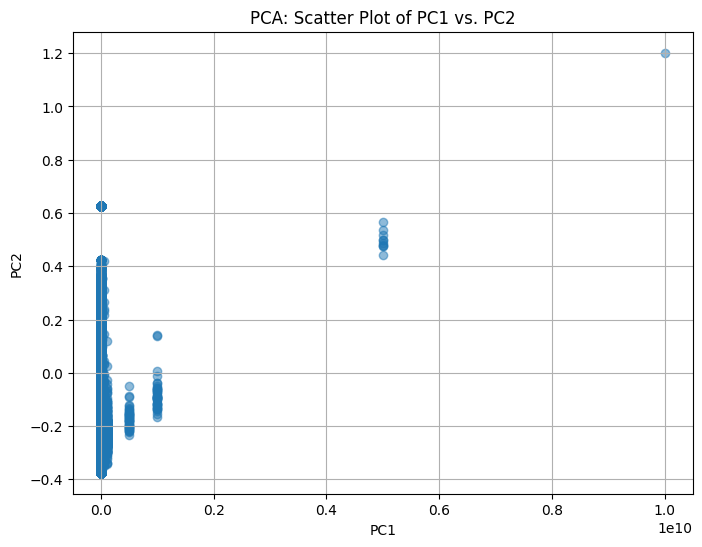

In [61]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)

selected_columns = ['Rating', 'Rating Count', 'Installs','Price']
X = data1[selected_columns]

principal_components = pca.fit_transform(X)

df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA: Scatter Plot of PC1 vs. PC2')
plt.grid(True)
plt.show()

##